 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [365]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

In [366]:
## Whale Returns
whale_loco=Path(r"C:\Users\Weesam\Documents\School\UOFT Work\Challenge 4\Starter_Code\Resources\whale_returns.csv") #Location Path of my Whale Return CSV

In [367]:
# Reading Whale returns
whale_data= pd.read_csv(whale_loco,index_col="Date", infer_datetime_format=True, parse_dates=True) #Read the CSV into a DataFrame 
whale_data.head() # Display a few rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [368]:
# Count nulls
whale_data.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [369]:
#Identify Null Values 
whale_data.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [370]:
#Determine the number of nulls in each column
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [371]:
# Drop nulls
whale_data.dropna(inplace=True) # Drops all columns that are true 
whale_data #Display the data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [372]:
#Verifying all nulls have been eliminated
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [373]:
#Algorithmic Returns
algo_loco=Path(r"C:\Users\Weesam\Documents\School\UOFT Work\Challenge 4\Starter_Code\Resources\algo_returns.csv") #Location Path of my Algorithmic Return CSV

In [374]:
# Reading algorithmic returns
algo_data= pd.read_csv(algo_loco,index_col="Date", infer_datetime_format=True, parse_dates=True) # Reads the CSV into a Data Frame
algo_data.head() #Displays a few rows

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [375]:
# Count nulls
algo_data.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [376]:
#Identify Null Values 
algo_data.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [377]:
#Determine the number of nulls in each column
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [378]:
# Drop nulls
algo_data.dropna(inplace=True) # Drops all columns that are true 
algo_data # Displays the Data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [379]:
#Verifying all nulls have been eliminated
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [395]:
#S&P TSX 60 Closing Prices
SP60_loco=Path(r"C:\Users\Weesam\Documents\School\UOFT Work\Challenge 4\Starter_Code\Resources\sp_tsx_history.csv")

In [396]:
# Reading S&P TSX 60 Closing Prices
SP60_data= pd.read_csv(SP60_loco,index_col="Date", infer_datetime_format=True, parse_dates=True) # Reads the CSV into a DataFrame
SP60_data.head() #Displays a few rows

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [397]:
# Check Data Types
SP60_data.dtypes

Close    object
dtype: object

In [400]:
# Fix Data Types
SP60_data["Close"] = SP60_data["Close"].str.replace("$", "")
SP60_data["Close"] = SP60_data["Close"].str.replace(",", "").astype(float)      #Removes $ sign and commas in the column then changes its type to a float 
#SP60_data.drop(columns=['Date'], inplace=True) #Drops the Date Column

C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\1153654428.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  SP60_data["Close"] = SP60_data["Close"].str.replace("$", "")


In [401]:
# Calculate Daily Returns
SP60_return=SP60_data.pct_change() #Calculate daily return 
SP60_return.head() #Displays a few rows

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [402]:
# Drop nulls
SP60_return.dropna()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [403]:
# Rename `Close` Column to be specific to this portfolio.
columns=['Daily Return SP60'] # New Column Name
SP60_return.columns=columns # Renaming the Column
SP60_return.head() # Display a few rows

,Daily Return SP60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [404]:
SP60_return.dropna(inplace=True) # Drop all nulls

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [405]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
Trio_data=pd.concat([whale_data,algo_data,SP60_return],axis="columns",join="inner") # Concat all three portfolios
Trio_data.head() #Displays a few rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return SP60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: >

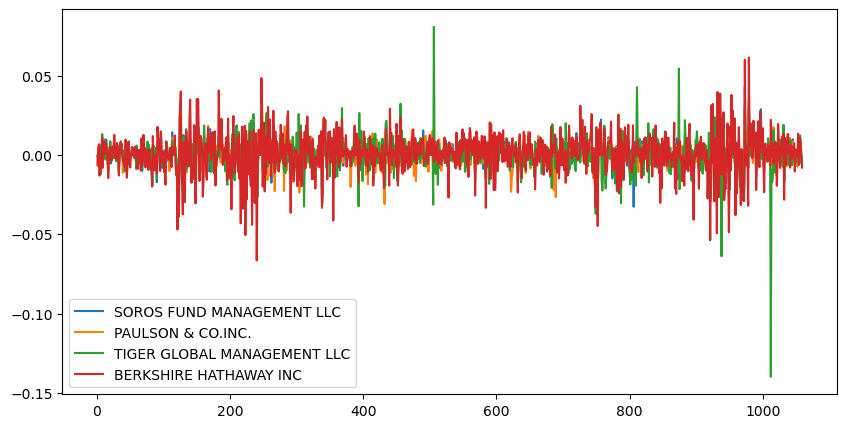

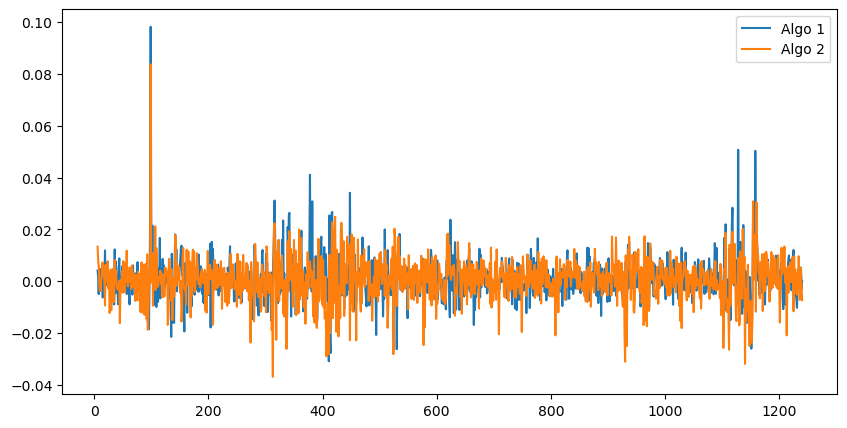

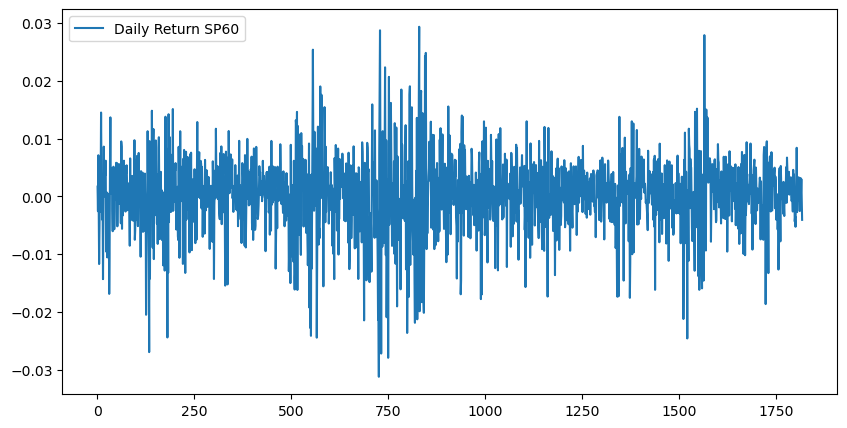

In [314]:
# Plot daily returns of all portfolios
whale_data.plot(figsize=(10,5)) # Plots the Daily returns of Whale Data and adjust the ouput figure size
algo_data.plot(figsize=(10,5)) # Plots the Daily returns of Algo Data and adjust the ouput figure size
SP60_return.plot(figsize=(10,5)) # Plots the Daily returns SP60 and adjust the ouput figure size

#### Calculate and Plot cumulative returns.

In [315]:
#Cumulative returns of Whale Data
cumulative_returns1 = (1 + whale_return).cumprod() - 1 # Calculate Cumulative Return using cumprod function for Whale Data
cumulative_returns1 # Displays a few rows

C:\Users\Weesam\anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002
2015-03-06,5.246788,-0.282397,16.115278,0.994020
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434
...,...,...,...,...
2019-04-25,NaN,NaN,NaN,NaN
2019-04-26,NaN,NaN,NaN,NaN
2019-04-29,NaN,NaN,NaN,NaN


In [316]:
#Cumulative Return for Algo Data
cumulative_returns2 = (1 + algo_return).cumprod() - 1 ## Calculate Cumulative Return using cumprod function for Algo Data
cumulative_returns2 #Display a few Rows

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,-0.542965,-0.376459
2014-06-09,-2.233668,-0.573347
2014-06-10,0.084597,-1.055362
2014-06-11,0.171748,-1.283121
...,...,...
2019-04-25,-0.832004,-1.545535
2019-04-26,-0.266162,-0.604394
2019-04-29,0.281984,-0.787028


---

In [317]:
#Cumulative Return for SP60 Data
cumulative_returns3 = (1 + SP60_return).cumprod() - 1 ## Calculate Cumulative Return using cumprod function for SP60 Data
cumulative_returns3 #Display a few Rows

,Daily Return SP60
0,NaN
1,0.001701
2,-0.000867
3,0.006264
4,0.003945
...,...
1813,0.383846
1814,0.384676
1815,0.388835
1816,0.387870


<Axes: title={'center': ' Cumulative Returns of SP60 Data '}>

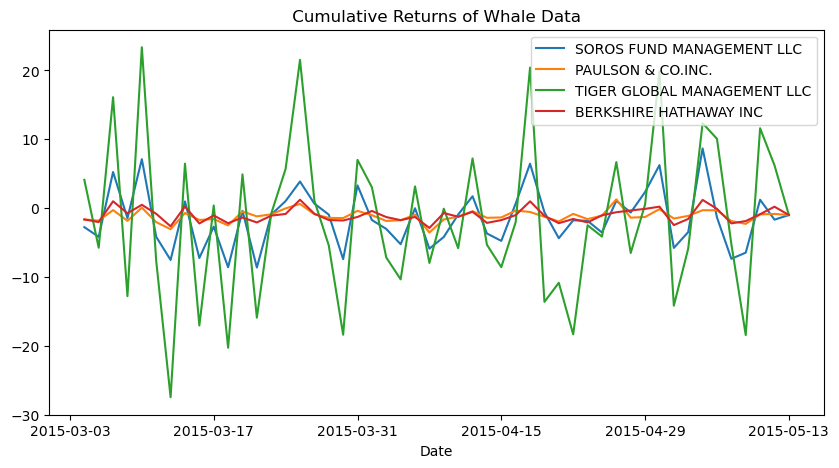

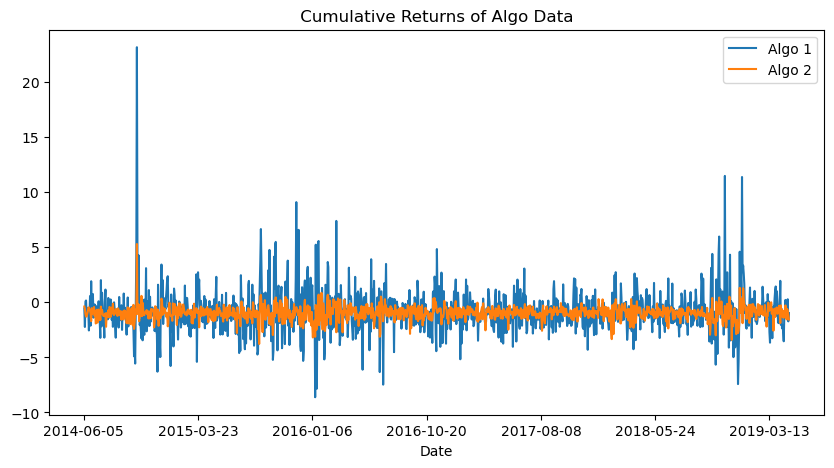

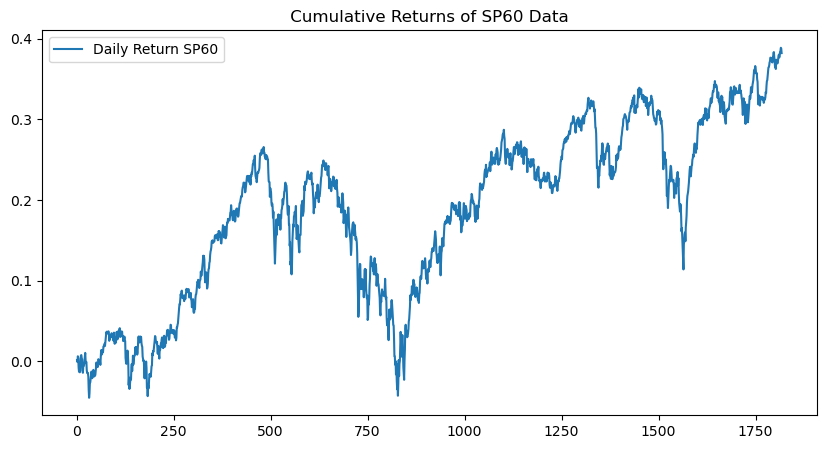

In [318]:
# Plot cumulative returns
cumulative_returns1.plot(figsize=(10,5),title=" Cumulative Returns of Whale Data ") #Plots Cumulative Return for Whale Data
cumulative_returns2.plot(figsize=(10,5),title=" Cumulative Returns of Algo Data ") #Plots Cumulative Return for Algo Data
cumulative_returns3.plot(figsize=(10,5),title=" Cumulative Returns of SP60 Data ") #Plots Cumulative Return for SP60 Data

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


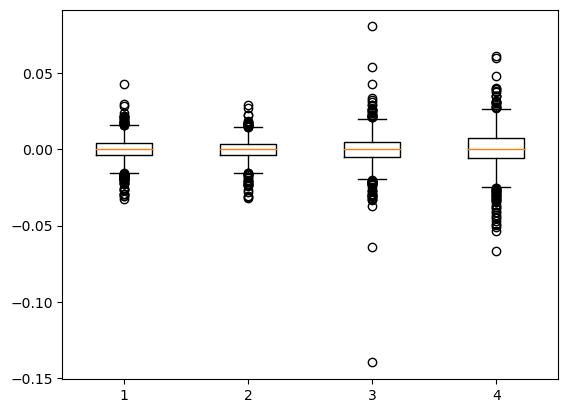

In [412]:
# Box plot to visually show risk
plt.boxplot(whale_data); # Box plot of Whale Data

In [ ]:
plt.boxplot(algo_data);  # Box plot of Algo Data

In [ ]:
plt.boxplot(SP60_data);  # Box plot of SP60 Data

### Calculate Standard Deviations

In [ ]:
# Daily Standard Deviations of Whale Data
whale_std=whale_data.std() # Calculates Standard Deviation for Whale Data
whale_std # Displays Results

In [ ]:
# Daily Standard Deviations of Algo Data
algo_std=algo_data.std() # Calculates Standard Deviation for Whale Data
algo_std # Displays Results

In [ ]:
# Daily Standard Deviations of SP60 Data
SP60_std=SP60_return.std() # Calculates Standard Deviation for Whale Data
SP60_std # Displays Results

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Determine which portfolios are riskier than the S&P TSX 60

# The Portfolios that are riskier than the S&P TSX 60 are : Soros Fund Mangement, Paulson & Co ,Tiger Global Management,Berkshire Hathaway, Algo 1 and Algo 2  

### Calculate the Annualized Standard Deviation

In [320]:
# Calculate the annualized standard deviation (252 trading days) ..... Im assuming all the Portfolios ??????????? 

# Annual Standard Deviation of Whale Data
trading_days=252 # Variable to contain the trading days
annual_std=whale_std*np.sqrt(trading_days) # We multiply the daily std of said data then square root it by the number of trading days
annual_std # Display Results

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [321]:
# Annual Standard Deviation of Algo Data

trading_days=252 # Variable to contain the trading days
annual_std2=algo_std*np.sqrt(trading_days) # We multiply the daily std of said data then square root it by the number of trading days
annual_std2 # Display Results

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [322]:
# Annual Standard Deviation of SP60 Data

trading_days=252 # Variable to contain the trading days
annual_std3=SP60_std*np.sqrt(trading_days) # We multiply the daily std of said data then square root it by the number of trading days
annual_std3 # Display Results

Daily Return SP60    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\3197454261.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_std1 = whale_data.rolling(window=21).std() # Calculate Rolling Standard Deviation using a 21 day window
C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\3197454261.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_std2 = algo_data.rolling(window=21).std() # Calculate Rolling Standard Deviation using a 21 day window


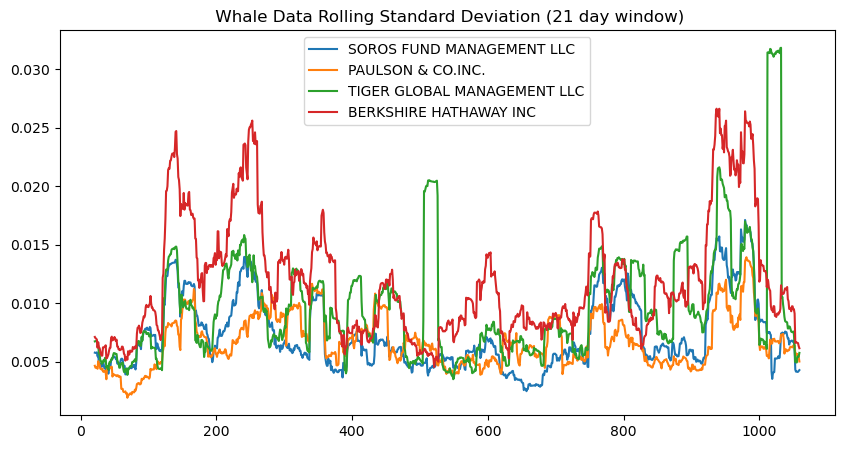

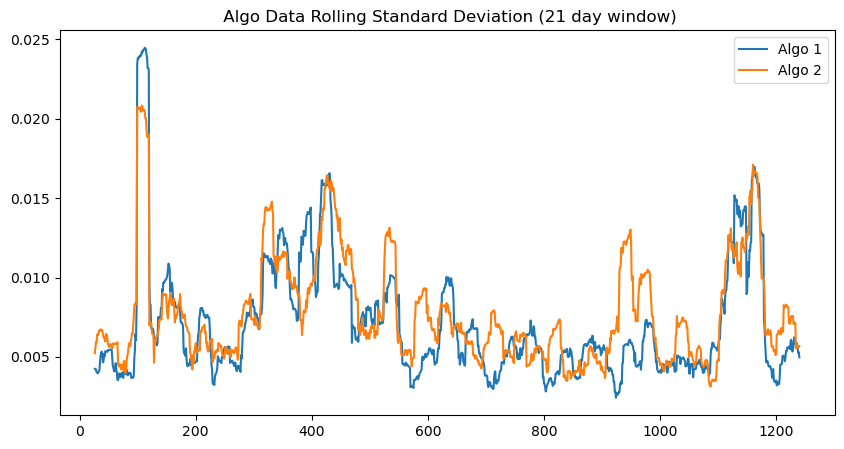

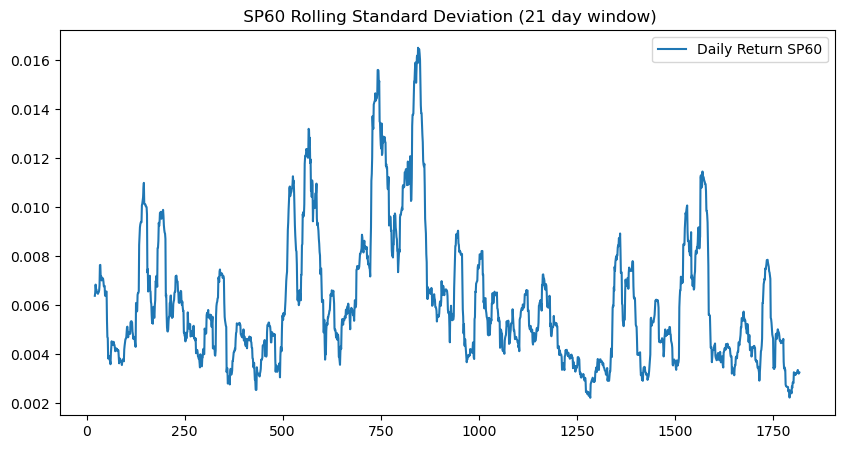

In [323]:
# Rolling standard deviation for Whale data using 21 day window
rolling_std1 = whale_data.rolling(window=21).std() # Calculate Rolling Standard Deviation using a 21 day window
rolling_std1.plot(figsize=(10,5),title=" Whale Data Rolling Standard Deviation (21 day window)"); # Plot the rolling standard deviation with title name

# Rolling standard deviation for Algo data using 21 day window
rolling_std2 = algo_data.rolling(window=21).std() # Calculate Rolling Standard Deviation using a 21 day window
rolling_std2.plot(figsize=(10,5),title=" Algo Data Rolling Standard Deviation (21 day window)"); # Plot the rolling standard deviation with title name

# Rolling standard deviation for SP60 data using 21 day window
rolling_std3 = SP60_return.rolling(window=21).std() # Calculate Rolling Standard Deviation using a 21 day window
rolling_std3.plot(figsize=(10,5),title=" SP60 Rolling Standard Deviation (21 day window)"); # Plot the rolling standard deviation with title name

### Calculate and plot the correlation

C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\4048489062.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1= whale_data.corr()


<Axes: >

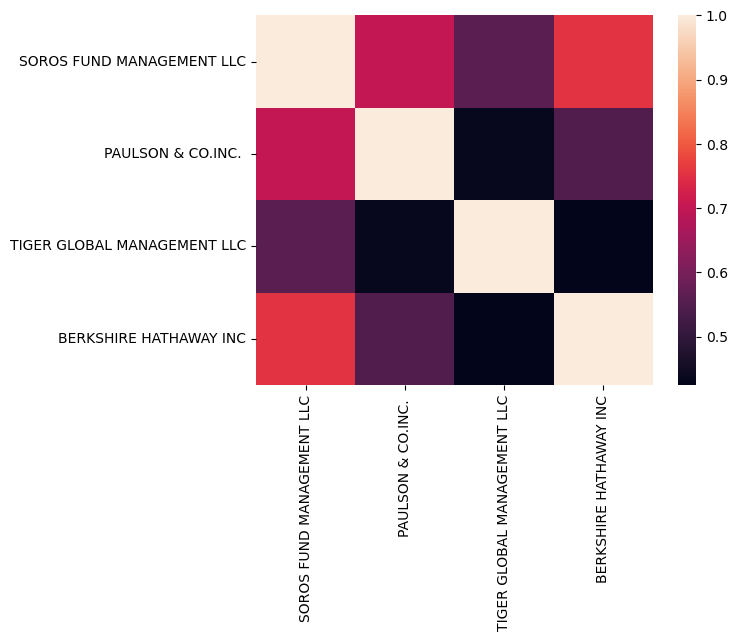

In [324]:
# Calculate the correlation
correlation1= whale_data.corr()
# Display de correlation matrix
sns.heatmap(correlation1)

C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\943181186.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation2= algo_data.corr()


<Axes: >

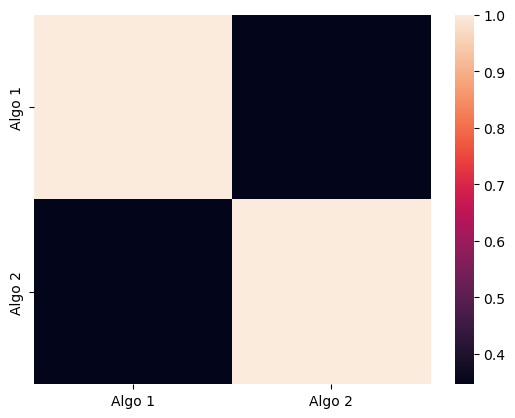

In [325]:
# Calculate the correlation
correlation2= algo_data.corr()
# Display de correlation matrix
sns.heatmap(correlation2)

<Axes: >

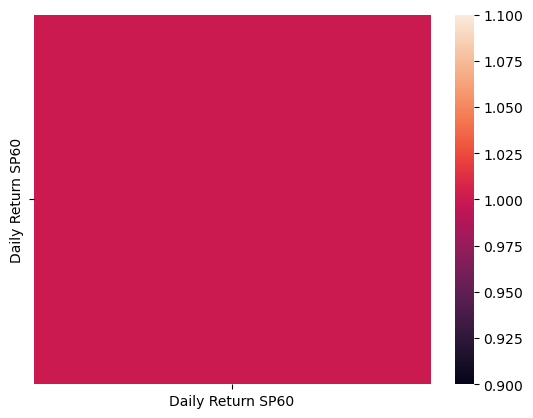

In [326]:
# Calculate the correlation
correlation3= SP60_return.corr()
# Display de correlation matrix
sns.heatmap(correlation3)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [327]:
# Calculate covariance of a single portfolio
covariance = algo_data['Algo 1'].cov(SP60_return['Daily Return SP60']) # Calculating Covariance from Algo Data and SP60 Data
covariance # Displays Covariance

6.752169014619033e-07

In [328]:
# Calculate variance of S&P TSX
variance = SP60_return['Daily Return SP60'].var() # Calculating Variance from SP60 Data
variance # Displays Variance

4.405458170898365e-05

In [329]:
# Computing beta
algo_beta= covariance/variance # Divides Covariance by Variance
algo_beta # Displays Results

0.015326825843501595

<BarContainer object of 1 artists>

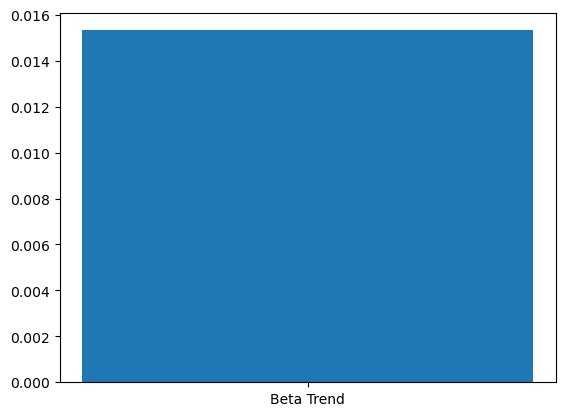

In [330]:
# Plot beta trend
plt.bar('Beta Trend', 0.015326825843501595) # Plots a simple bar with beta parametters

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [331]:
# Use `ewm` to calculate the rolling window: Whale Data
halflife=21 # Specifying halflife period
ewma_result1 = whale_data.ewm(halflife=halflife).std() # Calculates the Exponentially Weighted Average using std as the metric 
ewma_result1 # Displays Result

C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\1856944980.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  ewma_result1 = whale_data.ewm(halflife=halflife).std() # Calculates the Exponentially Weighted Average using std as the metric


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,NaN,NaN,NaN,NaN
2,0.002472,0.005814,0.001441,0.007624
3,0.002677,0.004968,0.002478,0.007020
4,0.005349,0.004615,0.004665,0.009387
5,0.004638,0.004471,0.005496,0.008066
...,...,...,...,...
1055,0.007066,0.006472,0.014873,0.011123
1056,0.007054,0.006569,0.014822,0.011044
1057,0.006939,0.006475,0.014630,0.010876
1058,0.006845,0.006387,0.014390,0.010753


---

In [332]:
# Use `ewm` to calculate the rolling window: Algo Data
halflife=21 # Specifying halflife period
ewma_result2 = algo_data.ewm(halflife=halflife).std() # Calculates the Exponentially Weighted Average using std as the metric 
ewma_result2 # Displays Result

C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\1292168747.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  ewma_result2 = algo_data.ewm(halflife=halflife).std() # Calculates the Exponentially Weighted Average using std as the metric


,Algo 1,Algo 2
6,NaN,NaN
7,0.001560,0.003536
8,0.004757,0.003857
9,0.004404,0.005849
10,0.004100,0.006861
...,...,...
1236,0.006583,0.007605
1237,0.006489,0.007520
1238,0.006432,0.007404
1239,0.006364,0.007299


In [333]:
# Use `ewm` to calculate the rolling window: SP60 Data
halflife=21 # Specifying halflife period
ewma_result3 = SP60_return.ewm(halflife=halflife).std() # Calculates the Exponentially Weighted Average using std as the metric 
ewma_result3 # Displays Result

,Daily Return SP60
0,NaN
1,NaN
2,0.003015
3,0.004905
4,0.004572
...,...
1813,0.003575
1814,0.003517
1815,0.003486
1816,0.003438


# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [334]:
# Annualized Sharpe Ratios
sharpe_ratios = ((Trio_data.mean()) * 252) / (Trio_data.std() * np.sqrt(252)) # Calculate the mean of each portfolio then divide it by the standard deviation. We then multiply by the square root of the trading days (252)
sharpe_ratios #Display Data

C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\960588766.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sharpe_ratios = ((Trio_data.mean()) * 252) / (Trio_data.std() * np.sqrt(252)) # Calculate the mean of each portfolio then divide it by the standard deviation. We then multiply by the square root of the trading days (252)
C:\Users\Weesam\AppData\Local\Temp\ipykernel_3388\960588766.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sharpe_ratios = ((Trio_data.mean()) * 252) / (Trio_data.std() * np.sqrt(252)) # Calculate th

SOROS FUND MANAGEMENT LLC      0.367157
PAULSON & CO.INC.             -0.470044
TIGER GLOBAL MANAGEMENT LLC   -0.113992
BERKSHIRE HATHAWAY INC         0.633782
Algo 1                         1.070733
Algo 2                         0.804573
Daily Return SP60              0.502295
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

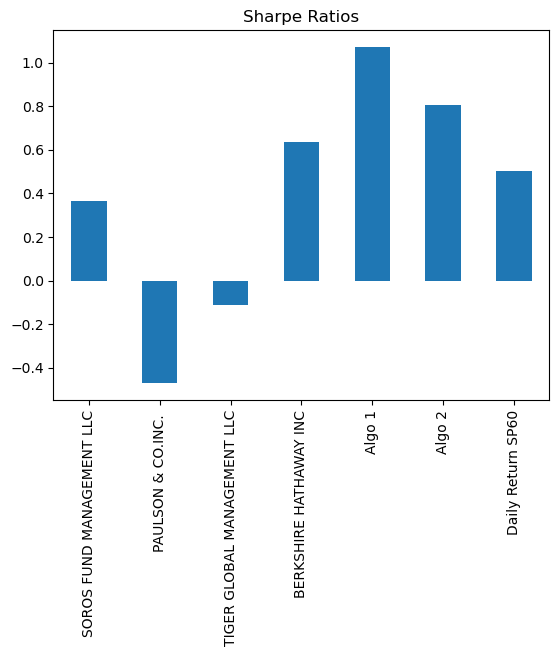

In [335]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios") # Visualizes a bar plot

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [336]:
# We can see Algo 1 has the highest Sharpe ratio (1.070733), followed by Algo 2 (0.804573), and Daily Return SP60 (0.502295). These algorithmic strategies have positive Sharpe ratios, proving they have provided better risk-adjusted returns compared to the risk-free rate.

# Soros Fund Management LLC and Berkshire Hathaway Inc also have positive Sharpe ratios, indicating they have performed well on a risk-adjusted basis.

# Paulson & Co. Inc. and Tiger Global Management LLC have negative Sharpe ratios, indicating that their returns have not compensated for the risk taken.

# In summary, both Algo 1 and Algo 2 outperform the market (S&P TSX 60) and the whale portfolios in terms of risk-adjusted returns.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [337]:
# Reading data from 1st stock
L_loco=Path(r"C:\Users\Weesam\Documents\School\UOFT Work\Challenge 4\Starter_Code\Resources\Custom Portfolio\l_historical.csv") #Location Path of my L_historical CSV
L_data=pd.read_csv(L_loco, index_col="Date", infer_datetime_format=True, parse_dates=True) # Reads CSV into Data Frame
L_data # Displays Data Frame

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [338]:
# Reading data from 2nd stock
otex_loco=Path(r"C:\Users\Weesam\Documents\School\UOFT Work\Challenge 4\Starter_Code\Resources\Custom Portfolio\otex_historical.csv") #Location Path of my Otex_historical CSV
otex_data=pd.read_csv(otex_loco,index_col="Date", infer_datetime_format=True, parse_dates=True) # Reads CSV into Data Frame
otex_data # Displays Data Frame

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [339]:
# Reading data from 3rd stock
shop_loco=Path(r"C:\Users\Weesam\Documents\School\UOFT Work\Challenge 4\Starter_Code\Resources\Custom Portfolio\shop_historical.csv") #Location Path of my Shop_historical CSV
shop_data=pd.read_csv(shop_loco,index_col="Date", infer_datetime_format=True, parse_dates=True)# Reads CSV into Data Frame
shop_data # Displays Data Frame

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [340]:
# Combine all stocks in a single DataFrame
trio1_data=pd.concat([L_data,otex_data,shop_data],axis="rows",join="inner") # Concats three data frames in one 
trio1_data # Displays the result

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [341]:
# Reset Date index
trio1_reset = trio1_data.reset_index()
trio1_reset

,Date,Symbol,Close
0,2018-01-02,L,57.99
1,2018-01-03,L,57.41
2,2018-01-04,L,57.42
3,2018-01-05,L,57.42
4,2018-01-08,L,56.86
...,...,...,...
1498,2019-12-20,SHOP,513.22
1499,2019-12-23,SHOP,511.62
1500,2019-12-24,SHOP,525.39
1501,2019-12-27,SHOP,534.76


In [342]:
# Reorganize portfolio data by having a column per symbol
trio_port= trio1_data.pivot_table(values="Close", index="Date", columns="Symbol") # Reorganize the Data
trio_port # Display Data

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [343]:
# Calculate daily returns
trio1_return=trio_port.pct_change()
trio1_return
# Drop NAs
trio1_return.dropna(inplace=True)
# Display sample data
trio1_return

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [344]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
port_return = trio1_return.dot(weights)
# Display sample data
port_return.head(10)

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
2018-01-10    0.000528
2018-01-11    0.000213
2018-01-12    0.004051
2018-01-15    0.004226
2018-01-16   -0.008559
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [422]:
# Join your returns DataFrame to the original returns DataFrame
Trio_data["custom"]=port_return # Creates a Custom Dataframe to include the weigheted Returns
Trio_data.tail() # Displays Results

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return SP60,custom
Date,,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,0.026937
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703,-0.000079


In [410]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Trio_data.dropna(inplace=True) # Eliminate all NaNs
Trio_data.head() # Display Results

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return SP60,custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [411]:
# Calculate the annualized `std`
trading_days=252 # Variable to contain the trading days
annual_std1=Trio_data*np.sqrt(trading_days) # We multiply the daily std of said data then square root it by the number of trading days
annual_std1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return SP60,custom
Date,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916,0.008964
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133,0.071707
2018-01-05,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061417,-0.049627
2018-01-08,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867,-0.015830
2018-01-09,-0.016311,0.013847,0.028401,0.011244,-0.015939,-0.033187,0.001547,-0.015853
...,...,...,...,...,...,...,...,...
2019-04-25,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.009973,0.054942
2019-04-26,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.035779,0.051484
2019-04-29,0.019912,0.043165,0.099226,0.082917,0.082673,0.044914,-0.012508,0.052435


### Calculate and plot rolling `std` with 21-day window

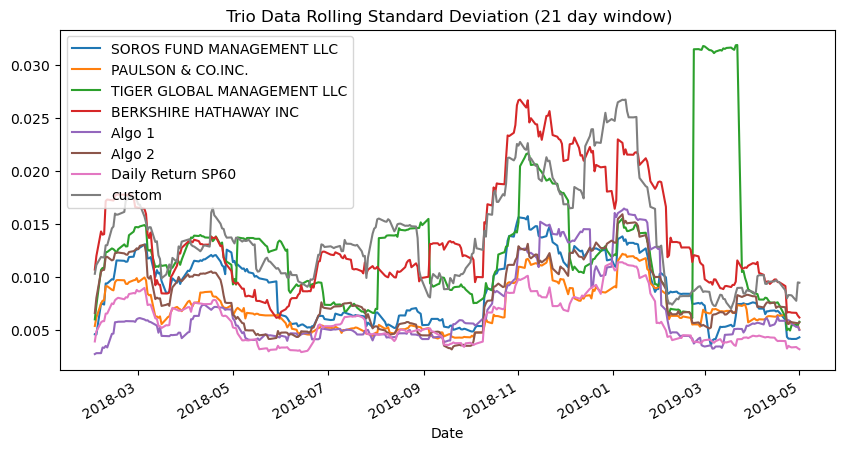

In [413]:
# Calculate rolling standard deviation
rolling_std4 = Trio_data.rolling(window=21).std() # Calculate Rolling Standard Deviation using a 21 day window
# Plot rolling standard deviation
rolling_std4.plot(figsize=(10,5),title=" Trio Data Rolling Standard Deviation (21 day window)"); # Plot the rolling standard deviation with title name

### Calculate and plot the correlation

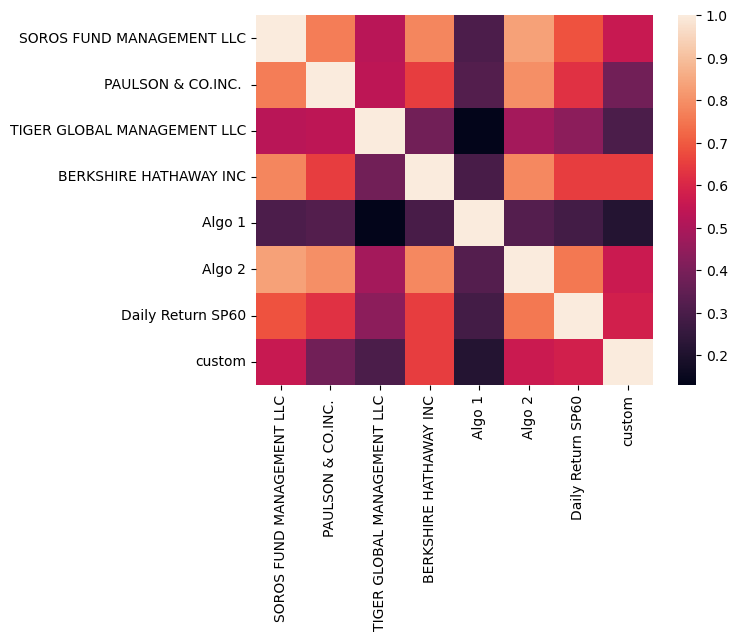

In [435]:
# Calculate and plot the correlation
correlation4 = Trio_data.corr() # Calculate Correlation
sns.heatmap(correlation4); # Plots Correlation

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [426]:
# Calculate 60-day rolling Beta of Custom Port vs. S&P 60 and plot the Beta

rolling_covariance = Trio_data["custom"].rolling(window=60).cov(SP60_return["Daily Return SP60"]) # Calculates Rolling Varriance between Custom and SP 60
rolling_variance = SP60_return["Daily Return SP60"].rolling(window=60).var() # Calculates Variance
rolling_beta = rolling_covariance / rolling_variance # Calculates Beta

rolling_beta.head() # Displays the results


Date
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
2012-10-09   NaN
dtype: float64

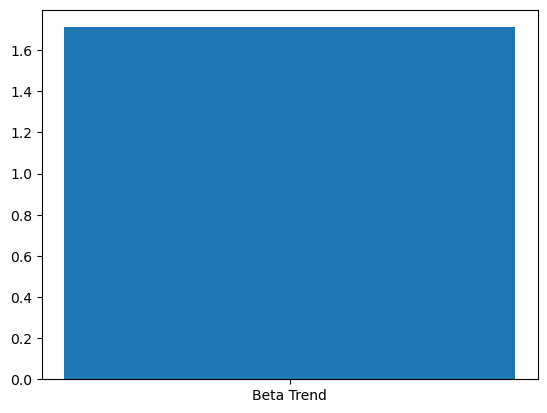

In [428]:
plt.bar('Beta Trend', rolling_beta); # Plots a simple bar with beta parametters

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [430]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios1 = ((trio1_return.mean()) * 252) / (trio1_return.std() * np.sqrt(252)) # Calculate the mean of each portfolio then divide it by the standard deviation. We then multiply by the square root of the trading days (252)
sharpe_ratios1 #Display Data

Symbol
L       0.570084
OTEX    0.743512
SHOP    1.655513
dtype: float64

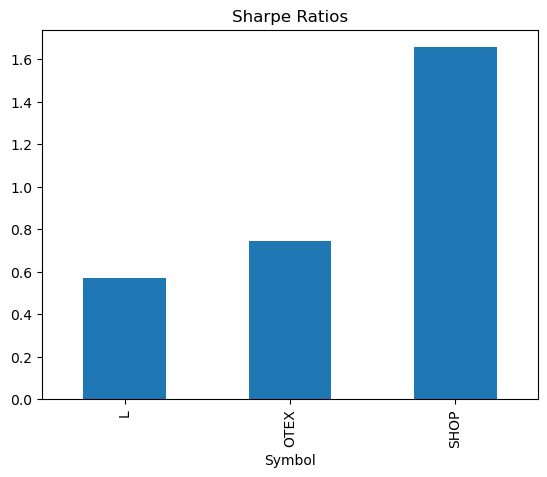

In [432]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios1.plot(kind="bar", title="Sharpe Ratios"); # Visualizes a bar plot

### How does your portfolio do?

Write your answer here!

In [ ]:
# My Portfolio performed okay! 

#L ( Assumed Weight: 1/3) : had a return of approximately 0.5701. It contributed positively to my portfolio's performance, but it's the lowest performer among the three assets.

#OTEX (Assumed Weight: 1/3): OTEX provided a return of about 0.7435. It had a positive impact on my portfolio's performance, and it performed better than asset L.

#SHOP (Assumed Weight: 1/3): SHOP had the highest return among the three assets, approximately 1.6555. It significantly boosted the portfolio's overall return.

#Overall, my portfolio seems to have performed well, with positive returns from all three assets.  
